This notebook contains dlp preprocessing, including clustering and saving (python 3.9.18)

Libraries:
• tensorflow 2.15.0
• keras 2.15.0
• scikit-learn 1.3.0
• matplotlib 3.7.1

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
DATASET_PATH = '../dataset'

### Preprocessing Pipeline on DLP (clustering)

In [6]:
# Load the extracted DLPs
encoder_train = np.load(f'{DATASET_PATH}/encoder_outputs/encoder_outputs_train_1008_l1e3.npy')
encoder_test = np.load(f'{DATASET_PATH}/encoder_outputs/encoder_outputs_test_1008_l1e3.npy')

In [5]:
encoder_all = np.concatenate([encoder_train, encoder_test])

0
Z average is 0
1
Z average is 0
2
{0, 1}
{0, 1, 2}
{0, 1, 2, 3}


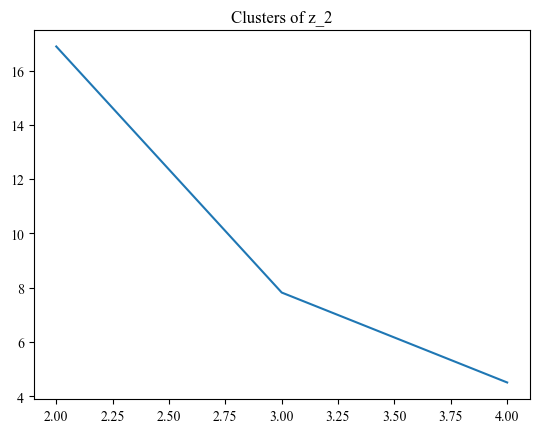

3
Z average is 0
4
{0, 1}
{0, 1, 2}
{0, 1, 2, 3}


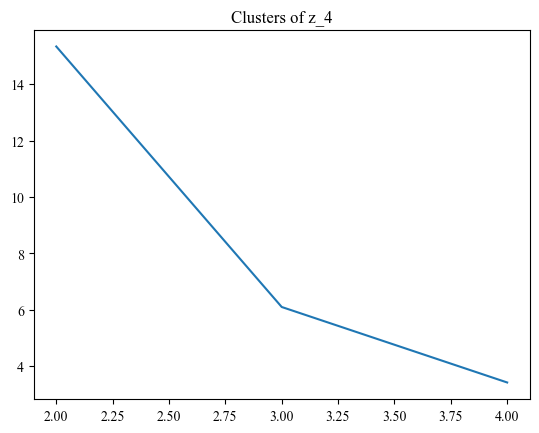

5
Z average is 0
6
Z average is 0
7
{0, 1}
{0, 1, 2}
{0, 1, 2, 3}


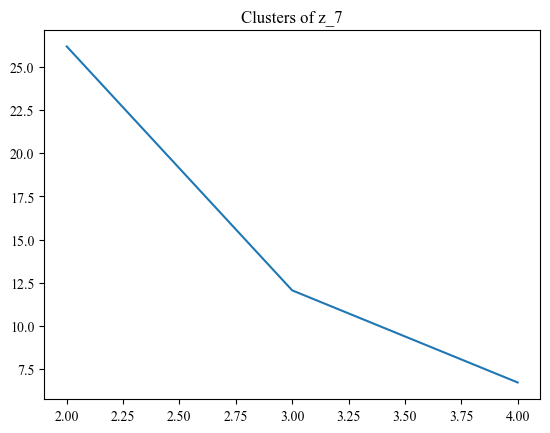

8
Z average is 0
9
Z average is 0
10
Z average is 0
11
Z average is 0
12
Z average is 0
13
{0, 1}
{0, 1, 2}
{0, 1, 2, 3}


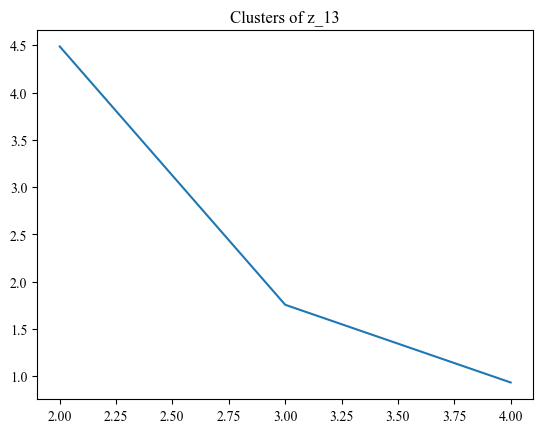

14
{0, 1}
{0, 1}
{1, 2}


c:\Users\sclab\anaconda3\envs\xai2\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\sclab\anaconda3\envs\xai2\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


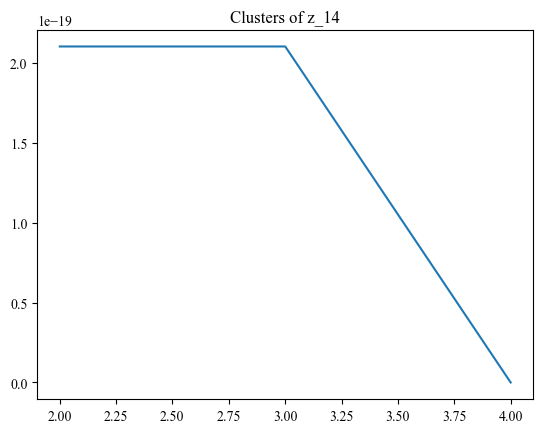

15
Z average is 0


In [49]:
encoder_outputs = np.copy(encoder_train).transpose()
for z in range(encoder_outputs.shape[0]):

    print(z)
    encoder_output = encoder_outputs[z].reshape(encoder_outputs.shape[1], 1)
    # print(encoder_output.size)
    # break
    if encoder_output.mean() == 0:
        print('Z average is 0')
        continue
    wcss = []
    silhouette_scores = []
    clusters = [*range(2,5,1)]
    # print(clusters)
    for cluster in clusters:
        kmeans = KMeans(n_clusters=cluster, random_state=0, n_init="auto")
        labels = kmeans.fit_predict(X=encoder_output)
        
        print(set(labels))
        # silhouette_avg = silhouette_score(encoder_output, labels)
        # silhouette_scores.append(silhouette_avg)
        
        wcss.append(kmeans.inertia_)
        
    plt.plot(clusters, wcss)
    plt.title(f"Clusters of z_{z}")
    plt.show()
    
    # plt.figure(figsize=(10, 6))
    # plt.plot(clusters, silhouette_scores, marker='o')
    # plt.xlabel('Number of Clusters')
    # plt.ylabel('Silhouette Score')
    # plt.title('Silhouette Scores for Various Numbers of Clusters')
    # plt.grid(True)
    # plt.show()

In [122]:
def cluster_z(data, num_cluster=3):
    encoder_outputs = np.copy(data).transpose()
    ae_labels = {}
    wcss = []
    feat_num = encoder_outputs.shape[0]
    for z in range(feat_num):
        encoder_output = encoder_outputs[z].reshape(encoder_outputs.shape[1], 1)
        
        if encoder_output.mean() == 0:
            # print(f'Z average is 0 at index', z)
            continue
        else:
            print('index:',z)
            print('----------')
            # continue
        print(z)
        cluster = num_cluster
        kmeans = KMeans(n_clusters=cluster, random_state=0, n_init="auto")
        labels = kmeans.fit_predict(X=encoder_output)
        
        # sort cluster
        centers = kmeans.cluster_centers_.reshape(-1)
        sorted_kmeans_cluster_centers = np.sort(centers)
        print('us', kmeans.cluster_centers_.reshape(-1))    
        print('s ', sorted_kmeans_cluster_centers)
        
        sorted_dic = {}
        for c in range(cluster):
            sorted_dic[c] = np.where(sorted_kmeans_cluster_centers == centers[c])[0][0]
        print(sorted_dic)
        sorted_cluster = np.array([sorted_dic[c] for c in kmeans.labels_])
        print('unsorted cluster member', labels)
        print('sorted_cluster member', sorted_cluster)

        ae_labels[f'f_z_{z}'] = sorted_cluster
        
        wcss.append(kmeans.inertia_)
        
    return ae_labels

### Cluster train z

In [132]:
ae_labels_train = cluster_z(encoder_train)
ae_labels_test = cluster_z(encoder_test)

index: 2
----------
2
us [0.07103512 0.01473393 0.1320843 ]
s  [0.01473393 0.07103512 0.1320843 ]
{0: 1, 1: 0, 2: 2}
unsorted cluster member [1 1 1 ... 0 0 2]
sorted_cluster member [0 0 0 ... 1 1 2]
index: 4
----------
4
us [0.13434    0.00491768 0.0699894 ]
s  [0.00491768 0.0699894  0.13434   ]
{0: 2, 1: 0, 2: 1}
unsorted cluster member [2 1 1 ... 2 0 2]
sorted_cluster member [1 0 0 ... 1 2 1]
index: 7
----------
7
us [0.02975512 0.08944884 0.17001265]
s  [0.02975512 0.08944884 0.17001265]
{0: 0, 1: 1, 2: 2}
unsorted cluster member [0 0 0 ... 1 1 1]
sorted_cluster member [0 0 0 ... 1 1 1]
index: 13
----------
13
us [0.00148919 0.0403709  0.08762336]
s  [0.00148919 0.0403709  0.08762336]
{0: 0, 1: 1, 2: 2}
unsorted cluster member [0 0 0 ... 0 0 0]
sorted_cluster member [0 0 0 ... 0 0 0]
index: 14
----------
14
us [2.7569058e-12 1.9654185e-03 0.0000000e+00]
s  [0.0000000e+00 2.7569058e-12 1.9654185e-03]
{0: 1, 1: 2, 2: 0}
unsorted cluster member [0 0 0 ... 0 0 0]
sorted_cluster member [

c:\Users\sclab\anaconda3\envs\xai2\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [143]:
print(np.where(ae_labels_train['f_z_14'] == 2))

# drop labels on train feature 14
# print(labels)
ae_labels_train_clean = ae_labels_train.copy()
del ae_labels_train_clean['f_z_14']
ae_labels_train_clean, ae_labels_test
with open(f'{DATASET_PATH}/z_train_l1e3_cluster_dic.pkl', 'wb') as f:
    pkl.dump(ae_labels_train_clean, f)
with open(f'{DATASET_PATH}/z_test_l1e3_cluster_dic.pkl', 'wb') as f:
    pkl.dump(ae_labels_test, f)

(array([14813], dtype=int64),)
